In [1]:
from feon.sa import *
import utills as uti
from feon.tools import pair_wise
import numpy as np 
import pandas as pd
import feon as  fn
from matplotlib import pyplot as plt

In [41]:
e = input("Ingrese el modulo de elasticidad: ").strip()
e = uti.verify_value_0(e)
a = input("Ingrese el modulo de area: ").strip()
a = uti.verify_value_0(a)
ii = input("Ingrese el modulo de inercia: ").strip()
ii = uti.verify_value_0(ii)

ncol = input("Ingrese el numero de columnas: ").strip()
ncol = uti.verify_value_1(ncol)
nniv = input("Ingrese el numero de filas: ").strip()
nniv = uti.verify_value_1(nniv)

sc = tuple([i for i in range(ncol)])
Nc = []
dic_nodo = {}
n_nodos = input("Ingrese la cantidad de nodos a los que se le apilcara una carga: ").strip()
n_nodos = uti.verify_value_2(n_nodos)
for i in range(int(n_nodos)):
    ingresa_nodo = input("Nodo {} de aplicacion de carga: ".format(i+1)).strip()
    ingresa_nodo = uti.verify_value_2(ingresa_nodo)
    Nc = list(set(Nc))
    fx = input("Ingrese la fuerza en x para el nodo {}: ".format(ingresa_nodo))
    fx = uti.verify_value_01(fx)
    fy = input("Ingrese la fuerza en y para el nodo {}: ".format(ingresa_nodo))
    fy = uti.verify_value_01(fy)
    dic_nodo[ingresa_nodo] = [fx, fy]

Ingrese el modulo de elasticidad: 0
Enter a correct value: 1
Ingrese el modulo de area: 1
Ingrese el modulo de inercia: 1
Ingrese el numero de columnas: 3
Ingrese el numero de filas: 3
Ingrese la cantidad de nodos a los que se le apilcara una carga: 1
Nodo 1 de aplicacion de carga: 2
Ingrese la fuerza en x para el nodo 2: -1000
Ingrese la fuerza en y para el nodo 2: 0


In [42]:
nodos_ = uti.lista_nodos(nniv, ncol)
print("Lista de nodos:")
for i in range(len(nodos_)):
    print("{}. {}".format(i+1, nodos_[i]))

Lista de nodos:
1. Node:(0.0, 0.0)
2. Node:(1.0, 0.0)
3. Node:(2.0, 0.0)
4. Node:(0.0, 1.0)
5. Node:(1.0, 1.0)
6. Node:(2.0, 1.0)
7. Node:(0.0, 2.0)
8. Node:(1.0, 2.0)
9. Node:(2.0, 2.0)


In [43]:
elementos_ = uti.total_elementos(nniv, ncol)
print("Elementos Totales:", elementos_)

Elementos en x: 2 en 2 niveles total: 4
Elementos en y: 3 en 2 niveles total: 6

Elementos Totales: 10


In [45]:
estructura = uti.drawing_estructure(nniv, ncol)
_, n = uti.m_r(E=e, A=a, I=ii, Ncol=ncol, Nniv=nniv, SC=sc, dic=dic_nodo)
alturas = []
for j in range(nniv-1):
    h = input("Ingrese la altura h{}: ".format(j+1)).strip()
    h = uti.verify_value_0(e)
    alturas.append(int(h))

Estructura (3x3):
╔═══╦═══╗
╢═══╢═══╢
╚═══╩═══╝
Ingrese la altura h1: 1
Ingrese la altura h2: 1


In [51]:
conde = uti.mmr(_, nniv, ncol)
for i in range(len(conde)):
    print([round(j, 2) for j in list(conde[i])])

(75, 75)

[9, 18, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26]

[-5.51, 15.55, -7.96]
[15.55, 43.32, -4.32]
[-7.96, -4.32, 10.6]


In [31]:
#print(n[0].disp)

In [ ]:
# fx = {completar}
# mm =  {completar MM matriz de masa}
drifts = uti.ujns_drifts(FX=fx, KOND=conde, MM=mm, lista_h=alturas)
for i in range(len(drifts)):
    print("{}. Drift: {}".format(i+1, drifts[0]))

Enter the parameters:

I: 1
R: 1
Z: 1
n: 1
Ct: 1
hn: 1
a: 1
Fa: 1
Fd: 1
Fs: 1
r: 1
Øp: 1
Øe: 1
g: 1


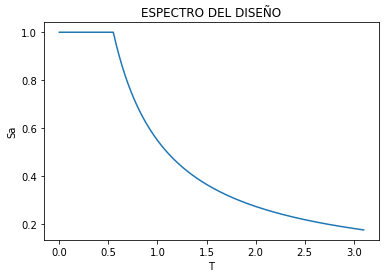

In [49]:
valores = uti.get_values()